In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#plotly library
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt

from wordcloud import WordCloud

#from a unix time to a date
from time import strftime
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [22]:
%pip install chart-studio

Note: you may need to restart the kernel to use updated packages.


In [23]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#plotly library
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt

from wordcloud import wordcloud

#from a unix time to a date
from time import strftime
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('ted_main.csv')

In [5]:
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.t

In [6]:
trace1 = go.Scatter(
    x = df.index,
    y = df.comments,
    mode = "lines",
    name = "comments",
    marker = dict(color = 'rgba(80,27,80,0.7)'),
    text = df.main_speaker)

data2 = [trace1]
layout = dict(title = "Ted Talks comments numbers analysis",
              xaxis = dict(title = 'index', ticklen = 5, zeroline = False)
              )
fig = dict(data = data2, layout = layout)
iplot(fig)

# Now, let's look at the number of people who spoke at TEDGLObal, Ted2002, Royal Institution.

In [7]:
dfGlobal = df[df['event'] == 'TEDGlobal 2005']
df2002 = df[df['event'] == 'TED2002']
dfRoyal = df[df['event'] == 'Royal Institution']

trace1 = go.Scatter(
        x = dfGlobal.index,
        y = dfGlobal.views,
        mode = "markers",
        name = "TEDGlobal 2005",
        marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
        text = dfGlobal.main_speaker
)
    
trace2 = go.Scatter(
        x = df2002.index,
        y = df2002.views,
        mode = "markers",
        name = "TED2002",
        marker = dict(color = 'rgba(255, 128, 200, 0.8)'),
        text = dfGlobal.main_speaker
)
    
trace3 = go.Scatter(
        x = dfRoyal.index,
        y = dfRoyal.views,
        mode = "markers",
        name = "Royal Institution",
        marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
        text = dfGlobal.main_speaker
)

data3 = [trace1, trace2, trace3]
layout = dict(title = 'Number of views counted at different shows',
             xaxis = dict(title = 'index', ticklen = 5, zeroline = False),
             yaxis = dict(title = 'views', ticklen = 5, zeroline = False))

fig = dict(data = data3, layout = layout)
iplot(fig)

# Bar Charts:

# 1) We will look the number of comments and conversation times for speakers according to the publication date.

# 2) Bar plot will be used for 6 speakers woth the highest number of comments.

In [9]:
import datetime

In [10]:
data_sorted = df.sort_values(by = 'comments', ascending = False)
data_sorted['published_date'] = [datetime.datetime.fromtimestamp(int(item)).strftime('%Y') for item in data_sorted.published_date]
data_comments = data_sorted.iloc[:6,:]
import datetime
data_duration = []
data_duration = [str(datetime.timedelta(seconds=i))+" minute " for i in data_comments.duration]
date = []
for item in data_comments.published_date:
    date.append(item + 'Year')

In [11]:
trace1 = go.Bar(
    x = date,
    y = data_comments.comments,
    name = "comments",
    marker = dict(color = 'rgba(255, 58, 255, 0.4)',
                  line=dict(color='rgb(0,0,0)', width=1.5)
),
    text = data_comments.main_speaker)

trace2 = go.Bar(
    x = date,
    y = data_comments.duration,
    name = "duration",
    marker = dict(color = 'rgba(15, 15, 250, 0.4)',
                  line=dict(color='rgb(0,0,0)', width=1.5)
),
    text = (data_duration + data_comments.main_speaker))
data4 = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data4, layout = layout)
iplot(fig)

# The number of views and talk times of 3 people who recieved the most number of views.

In [12]:
data_comments = data_sorted.iloc[:3,:]
trace1 = {
    'x': data_comments.main_speaker,
    'y': data_comments.comments,
    'name': 'comments',
    'type': 'bar',
    'marker': dict(
        color = 'rgb(8,48,107)'
    ),
    'opacity':0.6,
};

trace2 = {
    'x': data_comments.main_speaker,
    'y': data_comments.duration,
    'name': 'duration',
    'type': 'bar',
    'text': data_duration,
    'marker': dict(
        color = 'rgb(158,202,225)',
        line = dict(color = 'rgb(8, 48, 107)')
    ),
    'opacity':0.6,
};

data5 = [trace1, trace2];
layout = {
    'xaxis': {'title':'Main 3 speakers'},
    'barmode': 'relative',
    'title': 'Number of views and talk times of 3 people who received the most number of views'
}

fig = go.Figure(data = data5, layout = layout)
iplot(fig)

# Pie Plot - Views rate of 2006 events published

In [13]:
df['published_date'] = df['published_date'].apply(lambda x: datetime.fromtimestamp(int(x)).strftime('%Y'))

data_2006 = df[df['published_date'] == '2006']
labels = data_2006['event']
values = data_2006['views']
print(data_2006)

AttributeError: module 'datetime' has no attribute 'fromtimestamp'

In [14]:
from time import strftime
from datetime import datetime

df['published_date']=[datetime.fromtimestamp(int(item)).strftime('%Y') for item in df.published_date]
data_2006=df[df.published_date=='2006'].iloc[:,:]
labels=data_2006.event
# figure
fig = {
  "data": [
    {
      "values": data_2006.views,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Views Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"The number of watched talks events published in 2006",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Views",
                "x": 0.30,
                "y": 1.10
            },
        ]
    }
}
iplot(fig)

In [16]:
import pandas as pd
from datetime import datetime
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode

# Bubble Charts 

In [19]:
import plotly.offline as pyo
data_sorted = df.sort_values(by = 'views', ascending = True)
data = data_sorted.iloc[:20,:]
data.index = range(0, len(data))

trace = go.Scatter(
    x = df.index,
    y = df.index,
    mode = 'markers',
    marker = dict(
        color = df.duration,
        size = df.comments,
        showscale = True,
        sizemode = 'area'),
    text = df.main_speaker
)

layout = go.Layout(
    title = 'Bubble Charts',
    xaxis = dict(title = 'index'),
    yaxis = dict(title = 'views'),
    hovermode = 'closest'
)

fig = go.Figure(data = [trace], layout = layout)
pyo.iplot(fig)

# Histogram
# 1) Frequency of comments in 2014 and 2015

In [20]:
data_2014 = df.comments[df.event == 'TED2014']
data_2015 = df.comments[df.event == 'TED2015']

trace2 = go.Histogram(
    x = data_2014,
    opacity = 0.75,
    name = '2014',
    marker = dict(color = 'rgba(80, 27, 80, 0.7)'))

trace3 = go.Histogram(
    x = data_2015,
    opacity = 0.75,
    name = '2015',
    marker = dict(color = 'rgba(125, 2, 100, 0.6)'))

data = [trace2, trace3]
layout = go.Layout(barmode = 'overlay',
                   title = 'Frequency of comments in 2014 and 2015',
                   xaxis = dict(title = 'comments'),
                   yaxis = dict(title = 'count'),
                  )

fig = go.Figure(data = data, layout = layout)
iplot(fig)

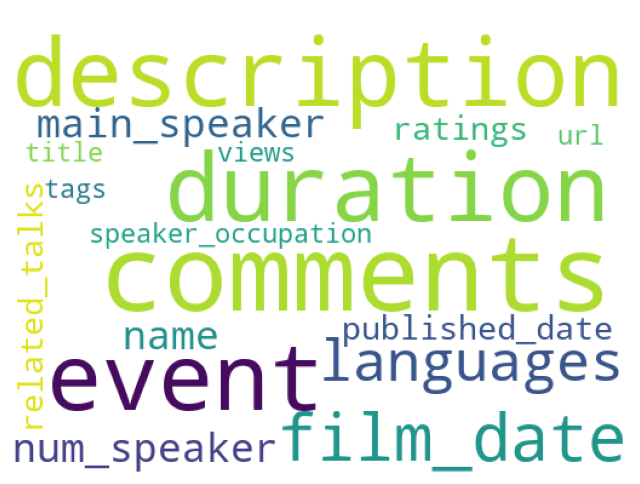

In [21]:
data_2017 = df[df.published_date == '2017']
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
    background_color = 'white',
    width = 512,
    height = 384
    ).generate(" ".join(data_2017))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

In [22]:
data_2012 = df[df.event == 'TED2012']

trace0 = go.Box(
    y = data_2012.comments,
    name = "Number of comments in 2012",
    marker = dict(
    color = 'rgb(12, 12, 140)',
    )
)

trace1 = go.Box(
    y = data_2012.duration,
    name = "Number of duration in 2012",
    marker = dict(
    color = 'rgb(12, 128, 128)',
    )
)

data = [trace0, trace1]
iplot(data)

# Scatterplot Matrix

In [23]:
import plotly.figure_factory as ff

df_occupation = df[df.event == 'TED2012']
data_occupation = df_occupation.loc[:, ["comments", "views"]]
data_occupation['index'] = np.arange(1, len(data_occupation)+1)

fig = ff.create_scatterplotmatrix(data_occupation, diag = 'box', index = 'index',
                                  colormap = 'Portland',
                                  colormap_type = 'cat',
                                  height = 700, width = 700)

iplot(fig)

# Insect Plots

In [29]:
import datetime

data_duration2 = []
data_duration2 = [str(datetime.timedelta(seconds = i)) + " minute" for i in df.duration]
df_100 = df.iloc[:100, :]

trace1 = go.Scatter(
    x = df_100.index,
    y = df_100.views,
    name = "views",
    marker = dict(color = 'rgba(225, 128, 225, 0.8)'),
)

trace2 = go.Scatter(
    x = df_100.index,
    y = df_100.duration,
    xaxis = 'x2',
    yaxis = 'y2',
    name = "duration",
    marker = dict(color = 'rgba(85, 20, 225, 0.8)'),
)

data = [trace1, trace2]

layout = go.Layout(
    xaxis2 = dict(
        domain = [0.6, 0.95],
        anchor = 'y2',
        ),
    yaxis = dict(
        domain = [0.6, 0.95],
        anchor = 'x2',
    ),
    title = "Views and duration of the first 100 talks"
)

fig = go.Figure(data = data, layout = layout)
plt.savefig('graph.png')
iplot(fig)
plt.show()

<Figure size 640x480 with 0 Axes>

# 3D Scatter Plot

In [28]:
data_sorted2 = df.sort_values(by='views', ascending=False)
df_150 = data_sorted2.iloc[:150,:]
df_150['views_rank'] = np.arange(1, len(df_150)+1)

x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 150).transpose()
trace1 = go.Scatter3d(
    x = df_150.views_rank,
    y=df_150.comments,
    z=df_150.duration,
    mode='markers',
    marker=dict(
        size=12,
        color=z,
        colorscale='Viridis',
        opacity=0.8
    ),
    text=data_duration2,)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Multiple Plots

In [27]:
trace1 = go.Scatter(
    x = df_150.views_rank,
    y = df_150.comments,
    mode = 'markers',
    name = "comments"
)

trace2 = go.Scatter(
    x = df_150.views_rank,
    y = df_150.duration,
    mode = 'markers',
    name = "duration"
)

data = [trace1, trace2]

layout = go.Layout(
    xaxis3 = dict(domain = [0, 0.45], anchor = 'y3'),
    yaxis3 = dict(domain = [0.55, 1], anchor = 'x3', title = 'Number of comments'),
    xaxis4 = dict(domain = [0.55, 1], anchor = 'y4'),
    yaxis4 = dict(domain =[0.55, 1], anchor = 'x4', title = 'Duration'),
    
    title = 'Number of Comments and Duration Vs number of Views Rank'
)

fig = go.Figure(data = data, layout = layout)
iplot(data)